In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<Axes: title={'center': 'Heat map with correlation matrix between columns'}>

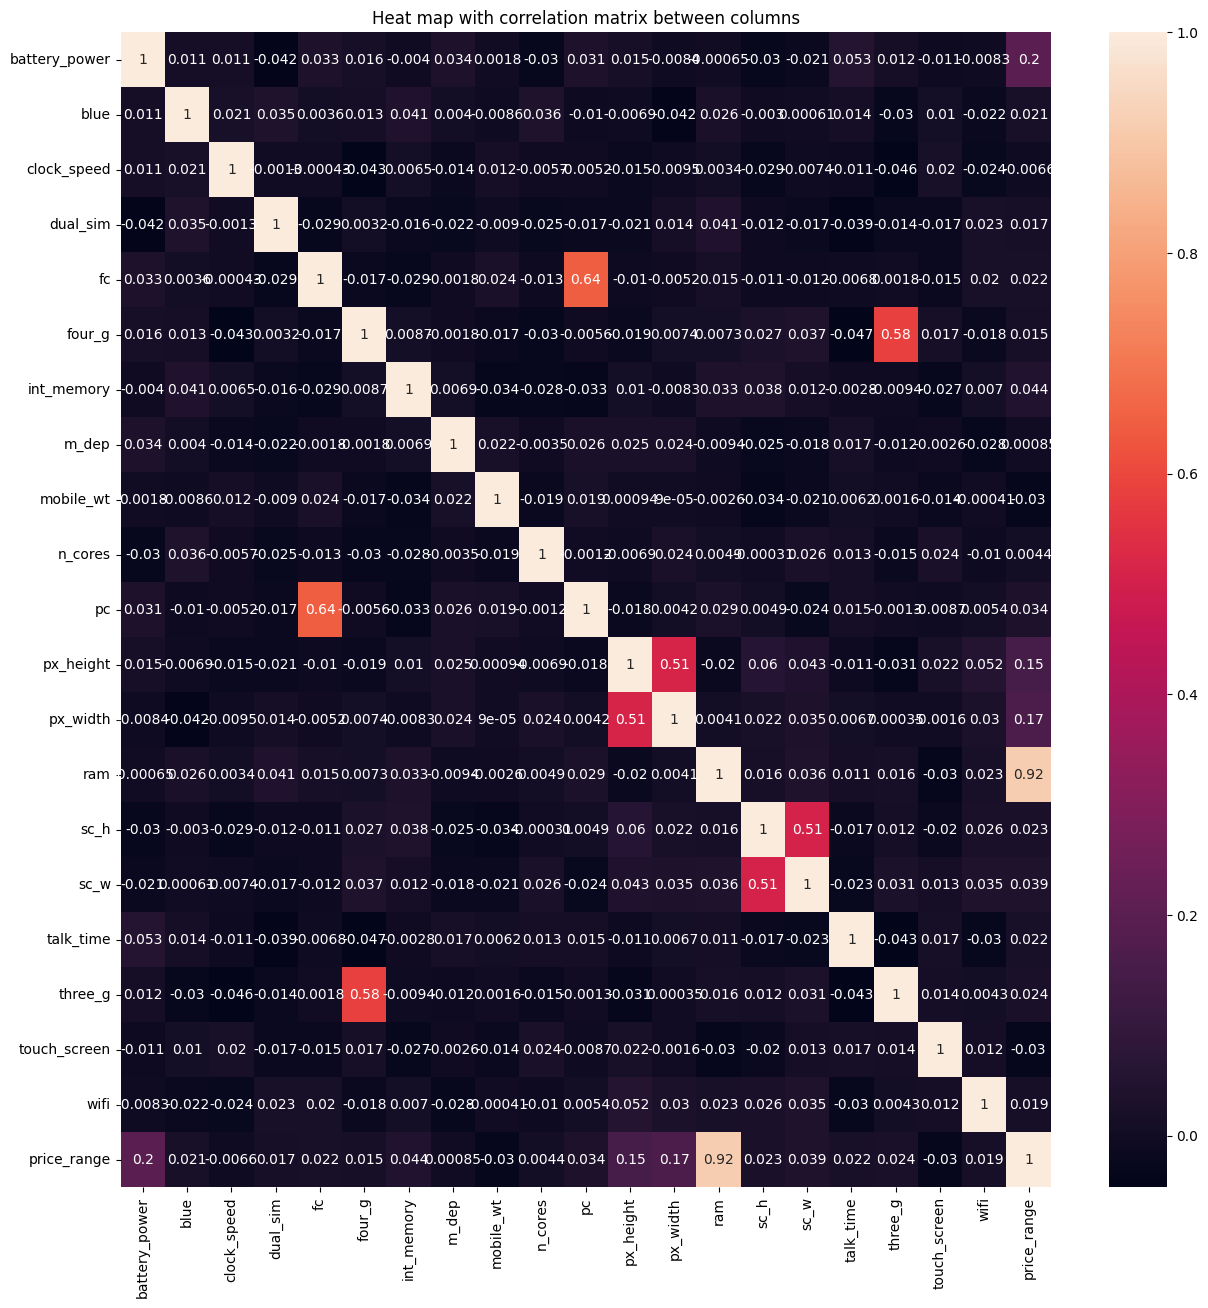

In [11]:
plt.figure(figsize = (15,15))
plt.title('Heat map with correlation matrix between columns')
sns.heatmap(data = train_data.corr(), annot = True)

In [14]:
def find_colinearity(df):
    lst = []
    for i in range(df.corr().shape[0]):
        for j in range(i + 1,df.corr().shape[1]):
            if abs(df.corr().iloc[i, j]) > 0.8:
                lst.append((i, j))
    lst = np.array(lst)
    print(f"There are {lst.shape[0]} values that has a big collinearity")
    return lst
ret = find_colinearity(train_data)

There are 1 values that has a big collinearity


In [19]:
for i in range(ret.shape[0]):
    print(f" The column {train_data.columns[ret[0,0]]} has a high collinearity with {train_data.columns[ret[0,1]]}")

 The column ram has a high collinearity with price_range


In [20]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [25]:
# We can't remove, because my label is higly correlated with the ram.

from sklearn.preprocessing import StandardScaler


def scaler(df):
    scaler = StandardScaler()
    labels_data = df.iloc[:, -1]
    train_data = scaler.fit_transform(df.drop(labels = "price_range", axis = 1))
    return labels_data, pd.DataFrame(data = train_data, columns = df.columns[:-1])
labels, train = scaler(train_data)

In [27]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


In [36]:
from sklearn.model_selection import train_test_split

train = np.array(train)

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size = 0.15, random_state = np.random.randint(low = 1, high = 300))

In [37]:
X_train

array([[ 1.67645691,  1.0100505 ,  0.46304231, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.65447995, -0.9900495 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-0.87528159, -0.9900495 , -0.64016902, ...,  0.55964063,
        -1.00601811, -1.01409939],
       ...,
       [-1.17575392, -0.9900495 , -0.51758998, ..., -1.78686097,
        -1.00601811, -1.01409939],
       [ 1.67418061, -0.9900495 , -1.2530642 , ..., -1.78686097,
        -1.00601811, -1.01409939],
       [ 1.4670368 ,  1.0100505 ,  1.4436746 , ...,  0.55964063,
         0.99401789,  0.98609664]])

In [38]:
X_train.shape, y_train.shape

((1700, 20), (1700,))

In [39]:
X_test.shape, y_test.shape

((300, 20), (300,))

In [41]:
y_train.value_counts()

price_range
2    431
3    427
0    421
1    421
Name: count, dtype: int64

In [46]:
from sklearn.svm import SVC

linear_svc = SVC(kernel = "linear", probability = True)
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)
y_pred_proba = linear_svc.predict_proba(X_test)

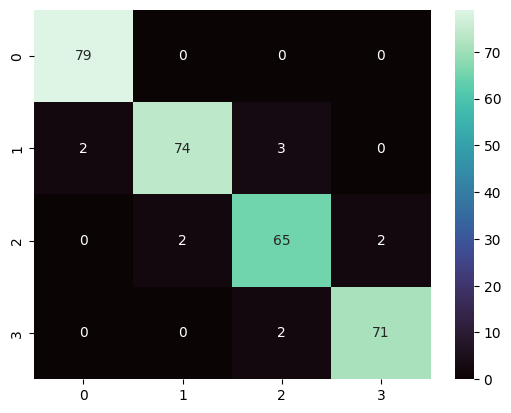

In [50]:
from sklearn.metrics import confusion_matrix


def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data = cm)
    sns.heatmap(cm_matrix, annot = True, fmt = "d", cmap = "mako")
plot_cm(y_test, y_pred)


In [51]:
from sklearn.metrics import accuracy_score

print(f"The accuracy is {accuracy_score(y_test, y_pred)}")

The accuracy is 0.9633333333333334


In [60]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (15, 15), tol=1e-4, max_iter=100000, random_state=42)
mlp.fit(X_train, y_train)

y_nn_pred = mlp.predict(X_test)
y_nn_pred_prob = mlp.predict_proba(X_test)

In [63]:
print(f"The accuracy is {accuracy_score(y_test, y_nn_pred)}")

The accuracy is 0.9266666666666666
